In [2]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

In [3]:
olsdata = pd.read_csv("olsdata.csv")
olsdata.head()

,N,V_max,sigma_V
0,10,0.178667,0.000577
1,20,0.324000,0.000577
2,30,0.484667,0.000577
3,40,0.620000,0.005774
4,50,0.723333,0.005774


In [4]:
#model = sm.OLS(olsdata['V_max'],sm.add_constant(olsdata['N']))
model = sm.OLS.from_formula('V_max ~ N', olsdata)
fit = model.fit()
fit.params

Intercept    0.050533
N            0.013853
dtype: float64

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Max emf')

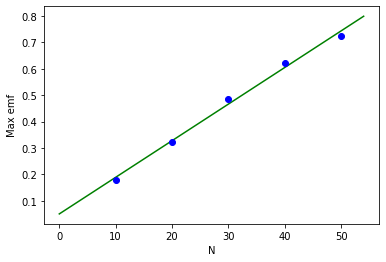

In [6]:
xs = np.arange(0,55,1)
ys = xs * fit.params[1] + fit.params[0]

plt.errorbar(olsdata['N'],olsdata['V_max'], yerr = olsdata['sigma_V'], fmt = 'o', color = 'blue', label = 'Data')
plt.plot(xs,ys, color = 'green', label = 'OLS fit')
plt.xlabel('N')
plt.ylabel('Max emf')

In [8]:
data = pd.read_csv('raisindata.csv')
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [12]:
fit = sm.OLS.from_formula('Area ~ MajorAxisLength + MinorAxisLength + MajorAxisLength : MinorAxisLength',data).fit()
fit.params

Intercept                         -12830.735852
MajorAxisLength                       15.410177
MinorAxisLength                       73.622485
MajorAxisLength:MinorAxisLength        0.660827
dtype: float64